
# PREDICTING MOVIE REVENUE (IMDB)
Given a data set of the 1,000 most popular movies on IMDB in the last 10 years, can you predict the revenue of a given movie?
Create a user for kaggle if not already done. 


Questions/Exercises:
1. Download the data programatically with python.

(Hint: To generate your own kaggle.json file go to your profile -> account -> Create new API Token, and then place the file it in ~/.kaggle/)

In [8]:
import pandas as pd
import sklearn.linear_model
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import os

os.environ["KAGGLE_USERNAME"] = "perlten"
os.environ["KAGGLE_KEY"] = "2184df94c35b67eaaef1ca9377e0b785"

import kaggle
kaggle.api.authenticate()
kaggle.api.dataset_download_files(
        'PromptCloudHQ/imdb-data', path='./', unzip=True)


You will now have to make a train-test-split of the data so that you have a way of verifying the model later. (We suggest 2/3 for training and 1/3 for testing)

Here is a link to the train-test-split documentation for sklearn

2. Fit the training-data into a model, present it visually and reflect on wether it is a good fit or not.

3. Now take the test-data, test the model and evaluate how accurate the model is.


0.005437913263368732


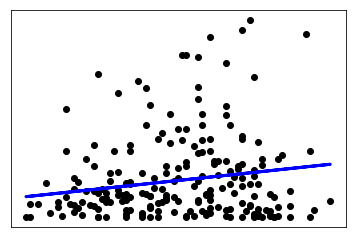

In [9]:
data = pd.read_csv("IMDB-Movie-Data.csv")

data = data[pd.notnull(data["Metascore"])]
data = data[pd.notnull(data["Revenue (Millions)"])]

xs = data["Metascore"]
ys = data["Revenue (Millions)"]

xs_reshape = np.array(xs).reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(xs_reshape, ys)

model = sklearn.linear_model.LinearRegression()

model.fit(x_train, y_train)

print(model.score(x_test, y_test))
y_predict = model.predict(x_test)

plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_predict, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()
